#### **Loading required libraries**

In [ ]:
!pip install textblob
!pip install wordcloud
!pip install kaggle
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
import string
from spacy.lang.en import English
from heapq import nlargest
punctuations = string.punctuation
from spacy.language import Language
nlp = English()
nlp.add_pipe('sentencizer')
parser = English()
!pip install -q vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt')
from nltk import sent_tokenize
from os import path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import plotly.express as px
from textblob import TextBlob
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import plotly.graph_objects as go
import numpy as np
import networkx as nx
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from nltk.tokenize import sent_tokenize
import spacy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
nltk.download('vader_lexicon')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.7 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

### **Data Source**


Here is the dataset link for the project

https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews/code?select=reviews_0_250.csv

In [ ]:
import os
from google.colab import files


In [ ]:
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dibyapandey","key":"c9166557cd553af796010997024017a1"}'}

In [ ]:
# Move the API key to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions for the API key
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Download the dataset
!kaggle datasets download -d nadyinky/sephora-products-and-skincare-reviews

# Unzip the downloaded dataset
!unzip sephora-products-and-skincare-reviews.zip


 95% 140M/147M [00:01<00:00, 137MB/s]
100% 147M/147M [00:01<00:00, 112MB/s]
Archive:  sephora-products-and-skincare-reviews.zip
  inflating: product_info.csv        
  inflating: reviews_0-250.csv       
  inflating: reviews_1250-end.csv    
  inflating: reviews_250-500.csv     
  inflating: reviews_500-750.csv     
  inflating: reviews_750-1250.csv    


In [ ]:
# Load the dataset
df_review1 = pd.read_csv('reviews_0-250.csv')
df_review2 = pd.read_csv('reviews_250-500.csv')
df_review3 = pd.read_csv('reviews_500-750.csv')
df_review4 = pd.read_csv('reviews_750-1250.csv')
df_review5 = pd.read_csv('reviews_1250-end.csv')
df_makeup_products = pd.read_csv('product_info.csv')

<ipython-input-7-bc696df2bd27>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review1 = pd.read_csv('reviews_0-250.csv')
<ipython-input-7-bc696df2bd27>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review4 = pd.read_csv('reviews_750-1250.csv')
<ipython-input-7-bc696df2bd27>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review5 = pd.read_csv('reviews_1250-end.csv')


In [ ]:
# Merge the dataframes into one
df_reviews = pd.concat([df_review1, df_review2, df_review3, df_review4, df_review5], ignore_index=True)

# Display the merged dataframe
df_reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
# Check for duplicates
duplicates = df_reviews.duplicated()


In [ ]:
# Remove duplicates
df_reviews = df_reviews.drop_duplicates()


In [ ]:
# Drop rows with missing values
df_reviews = df_reviews.dropna()

In [ ]:
cols_to_use = list(set(df_makeup_products.columns) - set(df_reviews.columns))
cols_to_use.append('product_id')

print(cols_to_use)

['child_min_price', 'child_count', 'limited_edition', 'reviews', 'out_of_stock', 'secondary_category', 'sale_price_usd', 'online_only', 'child_max_price', 'ingredients', 'size', 'value_price_usd', 'highlights', 'variation_desc', 'variation_type', 'primary_category', 'sephora_exclusive', 'brand_id', 'new', 'loves_count', 'tertiary_category', 'variation_value', 'product_id']


In [ ]:
# Perform the merge with an inner join on the 'product_id' column
result_df = pd.merge(df_makeup_products[cols_to_use], df_reviews, on='product_id', how='inner')

# Display the resulting DataFrame
result_df.columns

Index(['child_min_price', 'child_count', 'limited_edition', 'reviews',
       'out_of_stock', 'secondary_category', 'sale_price_usd', 'online_only',
       'child_max_price', 'ingredients', 'size', 'value_price_usd',
       'highlights', 'variation_desc', 'variation_type', 'primary_category',
       'sephora_exclusive', 'brand_id', 'new', 'loves_count',
       'tertiary_category', 'variation_value', 'product_id', 'Unnamed: 0',
       'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [ ]:
result_df['secondary_category'].unique()

array(['Moisturizers', 'Treatments', 'Eye Care', 'Lip Balms & Treatments',
       'Sunscreen', 'Cleansers', 'Value & Gift Sets', 'Masks',
       'Mini Size', 'Wellness', 'High Tech Tools', 'Self Tanners',
       'Shop by Concern'], dtype=object)

In [ ]:
result_df

,child_min_price,child_count,limited_edition,reviews,out_of_stock,secondary_category,sale_price_usd,online_only,child_max_price,ingredients,...,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_name,brand_name,price_usd
0,NaN,0,0,1321.0,0,Moisturizers,NaN,0,NaN,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",...,2023-02-09,"Ever since I bought this, I noticed that my sk...",Must have,medium,brown,oily,black,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
1,NaN,0,0,1321.0,0,Moisturizers,NaN,0,NaN,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",...,2022-12-01,I’ve been using this for 2 months now and I ca...,Incredible Collagen Sleeping Moisturizer! Luxury!,light,brown,combination,blonde,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
2,NaN,0,0,1321.0,0,Moisturizers,NaN,0,NaN,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",...,2022-05-27,"Great product. It is so moisturizing. However,...",Great but Jar isn’t filled all the way,lightMedium,green,dry,brown,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
3,NaN,0,0,1321.0,0,Moisturizers,NaN,0,NaN,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",...,2022-05-11,I’m addicted! I’m on my 3rd jar and it’s becom...,Staple in my night routine!,mediumTan,brown,normal,brown,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
4,NaN,0,0,1321.0,0,Moisturizers,NaN,0,NaN,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",...,2022-05-09,After I apply my serum I use this moisturizer ...,Moisturizing cream.,mediumTan,brown,combination,black,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294717,NaN,0,0,45.0,0,Eye Care,NaN,0,NaN,"['Aqua/Water/Eau, Caprylic/Capric Triglyceride...",...,2023-03-06,The consistency is more of a lotion which I re...,Love!,mediumTan,brown,oily,brown,Peptides + C Energy Eye Concentrate with Vitam...,Youth To The People,48.0
294718,NaN,0,1,8.0,0,Value & Gift Sets,320.0,1,NaN,"['Superfood Antioxidant Cleanser:', 'Water/Aqu...",...,2023-02-23,Purchased this when it was on sale for $255. G...,Amazing value,fair,brown,dry,brown,The Youth Vault: 13-Piece Vegan Skincare + App...,Youth To The People,340.0
294719,NaN,0,1,8.0,0,Value & Gift Sets,320.0,1,NaN,"['Superfood Antioxidant Cleanser:', 'Water/Aqu...",...,2023-01-25,everything works sooo well and the merch is ni...,amazinggg,fairLight,hazel,combination,auburn,The Youth Vault: 13-Piece Vegan Skincare + App...,Youth To The People,340.0
294720,NaN,0,1,4.0,0,Value & Gift Sets,NaN,0,NaN,"['Superfood Antioxidant Cleanser:', 'Water/Aqu...",...,2023-02-15,I really like the cleanser and the moisturizer...,Good Deal,lightMedium,brown,combination,auburn,Youth Stacks: Daily Skin Health Your Way for P...,Youth To The People,20.0


## **Sentiment Analaysis**

### **Choosing moisturizers column from secondary category**

In [ ]:
moisturizer_brand = 'Drunk Elephant'
moisturizer_reviews = result_df[(result_df['secondary_category'].str.contains('moisturizer', case=False)) & (result_df['brand_name'] == moisturizer_brand)]['review_text']


# Assuming moisturizer_reviews is a list of long review texts
max_chars = 1000000

tatcha_reviews = "\n\n".join(moisturizer_reviews)
chunks = [tatcha_reviews[i:i + max_chars] for i in range(0, len(tatcha_reviews), max_chars)]

# Write the consolidated chunks to a single file
with open('drunk_elephant.txt', 'w', encoding='utf-8') as file:
    file.write(chunks[0])



###**Reading the input text file**

In [ ]:
with open('/content/drunk_elephant.txt', 'r') as file:
    text = file.read().replace('\n', '')

#### **TEXT SUMMARIZATION**

In [ ]:
 #definig sentence importances
def sentences_importance(text, normalised_dict):
    importance ={}
    for sentence in nlp(text).sents:
        for token in sentence:
            target_token = token.text.lower()
            if target_token in normalised_dict.keys():
                if sentence in importance.keys():
                    importance[sentence]+=normalised_dict[target_token]
                else:
                    importance[sentence]=normalised_dict[target_token]
    return importance

In [ ]:
#Generating number vectors
def generate_numbers_vector(tokens):
    frequency = [tokens.count(token) for token in tokens]
    token_dict = dict(list(zip(tokens,frequency)))
    maximum_frequency=sorted(token_dict.values())[-1]
    normalised_dict = {token_key:token_dict[token_key]/maximum_frequency for token_key in token_dict.keys()}
    return normalised_dict

In [ ]:
#Define the preprocess function
def pre_process(document):
    clean_tokens = [token.lemma_.lower().strip() for token in document]
    clean_tokens = [token for token in clean_tokens if token not in STOP_WORDS and token not in punctuations]
    tokens = [token.text for token in document]
    lower_case_tokens = list(map(str.lower, tokens))
    return " ".join(lower_case_tokens)

In [ ]:
#defining to generate summary
def generate_summary(rank, text):
    target_document = parser(text)
    importance = sentences_importance(text, generate_numbers_vector(pre_process(target_document)))
    summary = nlargest(rank, importance, key=importance.get)
    return summary

In [ ]:
# Save the summary
num_sentences_to_generate = 10
summary=(generate_summary(num_sentences_to_generate, text))

# Filename is complete path to file plus name and .txt extension
file = open('summary.txt', 'w')
file.write(str(summary))
file.close()

In [ ]:
summary

[I got after years of watching reviews and I decided to get it ,after about 3 weeks of useing it the pump stopped working and I didn’t see really any resulting  it was saying and I loved at first but I think it started breaking me out  and I have to slam it on my palm in order to get the product out and I’m also sad it doesn’t how much product you actually get  , I plan on giving the moisturizer to my 54 mother insided and I’ll try to find the pump if I can , I just prefer my ordinary moisturizerI was able to get this product through a sample.,
 Love!!!!Im in love everything about it have super  sensitive and a bit a redness near me nose and big pores and now my face is getting more youth appearance and smooth is so  moist  without that an  oilly feelingMeh, I don’t really feel improvement after using this moisturizer.,
  It’s a decent cream moisturizer,  but for someone with combination/oily skin,  I have to use a very small amount during the day or I’ll end up shiny in no time.,
  I 

####**SENTIMENT ANALYSIS**

In [ ]:
analyzer=SentimentIntensityAnalyzer()
summary_text = str(summary)
res=analyzer.polarity_scores(summary_text)
print(res)

{'neg': 0.055, 'neu': 0.789, 'pos': 0.157, 'compound': 0.9966}


In [ ]:
# Finding the subjectivity

blob = TextBlob(summary_text)

# Calculate subjectivity
subjectivity = blob.sentiment.subjectivity

# Print the subjectivity score
print("Subjectivity:", subjectivity)

# Interpret the subjectivity score
if subjectivity < 0.5:
    print("The text is more objective.")
else:
    print("The text is more subjective.")

Subjectivity: 0.507085137085137
The text is more subjective.


In [ ]:
pos = res["pos"]
neu = res["neu"]
neg = res["neg"]
print(f'The percentage of positive sentiment is {round(pos*100,2)}%')
print(f'The percentage of neutral sentiment is {round(neu*100,2)}%')
print(f'The percentage of negative sentiment is {round(neg*100,2)}%')


The percentage of positive sentiment is 15.7%
The percentage of neutral sentiment is 78.9%
The percentage of negative sentiment is 5.5%


In [ ]:
# get polarity scores
neg, pos, neu = [],[],[]
for i, val in res.items():
    #ss = sia.polarity_scores(str(mylist))
    neg.append(res['neg'])
    pos.append(res['pos'])
    neu.append(res['neu'])
res['neg'] = neg
res['pos'] = pos
res['neu'] = neu

In [ ]:
fig = px.scatter_ternary(res, a="neu", b="pos", c="neg")
fig.show()


#### **NAMED ENTITY RECOGNITION**

In [ ]:
# Load the spaCy model for NER
nlp_model = "en_core_web_sm"
nlp = spacy.load(nlp_model)

In [ ]:
# Read the content from the summaryl file
with open("summary.txt", "r") as file:
    document_content = file.read()

In [ ]:
# Function for Named Entity Recognition
def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities
extracted_entities = perform_ner(document_content)

# Print the extracted named entities and their labels
print("Named Entities:")
for entity, label in extracted_entities:
    print(f"{entity} - {label}")

Named Entities:
years - DATE
about 3 weeks - DATE
first - ORDINAL
54 - CARDINAL
moisturizerI - PERSON
the day - DATE
1.69 - CARDINAL
4 months - DATE
first - ORDINAL
70 - MONEY
a few weeks later - DATE
second - ORDINAL
night - TIME
morning - TIME
Drunk Elephant!l - ORG


#### **TOPIC MODELING**

In [ ]:
with open("summary.txt", "r") as file:
    data = file.read()
#tokenize the data into sentences
documents=sent_tokenize(str(data))
# convert the text to a tf-idf weighted term-document matrix
vectorizer = TfidfVectorizer(max_features=2000, min_df=1, stop_words='english')
X = vectorizer.fit_transform(documents)
idx_to_word = np.array(vectorizer.get_feature_names_out())

# apply NMF
nmf = NMF(n_components=5, solver="cd")
W = nmf.fit_transform(X)
H = nmf.components_
# print the topics
for i, topic in enumerate(H):
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word [topic.argsort()[-20:]]])))


Topic 1: improvement,expected,floz,pores,clarity,thicker,im,decent,sink,works,say,really,product,actually,love,super,cream,sensitive,definitely,moisturizer
Topic 2: pairing,takes,shiny,change,appearance,inside,feelingmeh,lie,love,face,open,using,definitely,sensitive,cream,super,bit,feel,small,skin
Topic 3: cover,enjoy,skeptical,ingredients,realized,purchase,soft,spend,elephant,saw,ended,ran,second,product,skin,sample,doesn,leaves,feeling,size
Topic 4: years,prefer,plan,palm,resulting,reviews,insided,ordinary,loved,sad,saying,decided,slam,mother,stopped,moisturizeri,breaking,order,product,pump
Topic 5: use,used,started,break,worse,having,work,won,fast,right,approximately,run,pricey,priced,tlc,till,better,months,acne,buying


In [ ]:
def display_topics(model, features, no_top_words=20):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # Invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            word = features[largest[i]]
            weight = abs(words[largest[i]] * 100.0 / total)
            print("  %s (%2.2f)" % (word, weight))

In [ ]:
# Call the display_topics function to show the topics
display_topics(nmf, idx_to_word)


Topic 00
  moisturizer (3.41)
  definitely (2.74)
  sensitive (2.70)
  cream (2.69)
  super (2.68)
  love (1.67)
  actually (1.56)
  product (1.56)
  really (1.53)
  say (1.52)
  works (1.50)
  sink (1.50)
  decent (1.49)
  im (1.45)
  thicker (1.45)
  clarity (1.44)
  pores (1.43)
  floz (1.43)
  expected (1.41)
  improvement (1.40)

Topic 01
  skin (8.00)
  small (4.13)
  feel (3.94)
  bit (3.88)
  super (2.31)
  cream (2.30)
  sensitive (2.29)
  definitely (2.26)
  using (2.02)
  open (2.02)
  face (1.63)
  love (1.52)
  lie (1.17)
  feelingmeh (1.16)
  inside (1.16)
  appearance (1.15)
  change (1.15)
  shiny (1.15)
  takes (1.15)
  pairing (1.15)

Topic 02
  size (4.80)
  feeling (3.20)
  leaves (3.20)
  doesn (2.52)
  sample (2.52)
  skin (2.52)
  product (2.04)
  second (1.60)
  ran (1.60)
  ended (1.60)
  saw (1.60)
  elephant (1.60)
  spend (1.60)
  soft (1.60)
  purchase (1.60)
  realized (1.60)
  ingredients (1.60)
  skeptical (1.60)
  enjoy (1.60)
  cover (1.60)

Topic 03


#### **WORD FREQUENCY ANALYSIS**

Word Frequency: Counter({'product': 6, 'get': 5, 'skin': 5, 'small': 5, 'amount': 4, 'cant': 4, 'got': 3, 'doesnt': 3, 'actually': 3, 'moisturizer': 3, 'sample': 3, 'love': 3, 'bit': 3, 'face': 3, 'feel': 3, 'its': 3, 'size': 3, 'weeks': 2, 'pump': 2, 'didnt': 2, 'first': 2, 'started': 2, 'Im': 2, 'also': 2, 'much': 2, 'Ill': 2, 'find': 2, 'super': 2, 'sensitive': 2, 'getting': 2, 'using': 2, 'cream': 2, 'use': 2, 'day': 2, 'definitely': 2, 'single': 2, 'open': 2, 'used': 2, 'every': 2, 'night': 2, 'since': 2, 'full': 2, 'feeling': 2, 'I': 1, 'years': 1, 'watching': 1, 'reviews': 1, 'decided': 1, 'after': 1, '3': 1, 'useing': 1, 'stopped': 1, 'working': 1, 'resulting': 1, 'saying': 1, 'loved': 1, 'think': 1, 'breaking': 1, 'slam': 1, 'palm': 1, 'order': 1, 'sad': 1, 'plan': 1, 'giving': 1, '54': 1, 'mother': 1, 'insided': 1, 'try': 1, 'prefer': 1, 'ordinary': 1, 'moisturizerI': 1, 'able': 1, 'LoveIm': 1, 'everything': 1, 'redness': 1, 'near': 1, 'nose': 1, 'big': 1, 'pores': 1, 'youth'

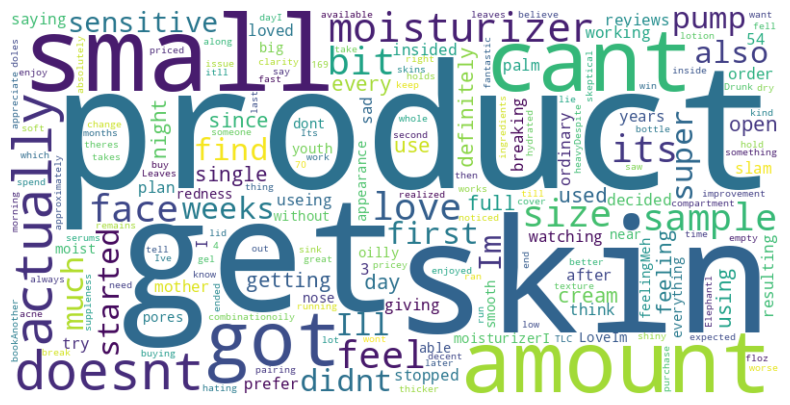

In [ ]:
  # Get a list of stopwords
stop_words = set(stopwords.words("english"))
additional_stop_words = [ 'said','f','see','yes','Yes','like','really']
stop_words.update(additional_stop_words)



# Read the content from the "summary.txt" file
with open("summary.txt", "r") as file:
    summary = file.read()

# Tokenize the summary
word_tokens = summary.split()

# Remove non-alphanumeric characters and filter out stopwords
filtered_words = [re.sub(r'\W+', '', word) for word in word_tokens if word.lower() not in stop_words and re.sub(r'\W+', '', word) != '']
# Calculate word frequencies
word_freq = Counter(filtered_words)

# Print word frequencies
print("Word Frequency:", word_freq)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


#### **WORD EMBEDDINGS**

In [ ]:
stop_words = set(stopwords.words("english"))
# Define your list of additional stop words
additional_stop_words = ['team','single','via','miss','']
stop_words.update(additional_stop_words)
# Read the content from the original file (e.g., "summary.txt")
with open("summary.txt", "r") as file:
    summary = file.read()

#Preprocess the summary and tokenize it
tokenized_summary = simple_preprocess(summary)
processed_summary = [word for word in tokenized_summary if word not in stop_words]
# Train the Word2Vec model with tokenized sentences
model = Word2Vec(sentences=[processed_summary], vector_size=100, window=5, min_count=1, workers=4)

# Get the word embeddings for specific words
word_embeddings = {word: model.wv[word] for word in tokenized_summary if word in model.wv}

# Convert word embeddings to a 2D array
word_vectors_2d = np.array([model.wv[word] for word in word_embeddings])

# Reduce the dimensionality using t-SNE with reduced perplexity
perplexity_value = min(30, len(word_embeddings) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors_2d)

# Create a DataFrame to hold the 2D coordinates and word labels
df = pd.DataFrame(word_vectors_2d, columns=['Dimension 1', 'Dimension 2'])
df['Word'] = list(word_embeddings.keys())

# Create the scatter plot using Plotly
fig = px.scatter(df, x='Dimension 1', y='Dimension 2', text='Word', title='Word Embeddings Scatter Plot')

# Customize the layout
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)

# Show the plot
fig.show()

In [ ]:
# Create an empty figure
fig = go.Figure()

# Define colors
colors = px.colors.qualitative.Plotly

# Loop through each word embedding and add a scatter trace for it
for i, word in enumerate(df['Word']):
    fig.add_trace(go.Scatter(x=[df['Dimension 1'][i]], y=[df['Dimension 2'][i]],
                             mode='markers',
                             name=word,  # Legend label
                             marker_color=colors[i % len(colors)])) # Use different colors

# Customize the layout
fig.update_layout(title='Word Embeddings Scatter Plot',
                  xaxis_title='Dimension 1',
                  yaxis_title='Dimension 2',
                  legend_title='Words',
                  legend=dict(orientation="v",  # Vertical orientation
                              yanchor="top",
                              y=1.02,
                              xanchor="left",
                              x=1)  # Position outside the plot
                  )

# Show the plot
fig.show()


<ipython-input-38-d51ddb345d83>:24: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



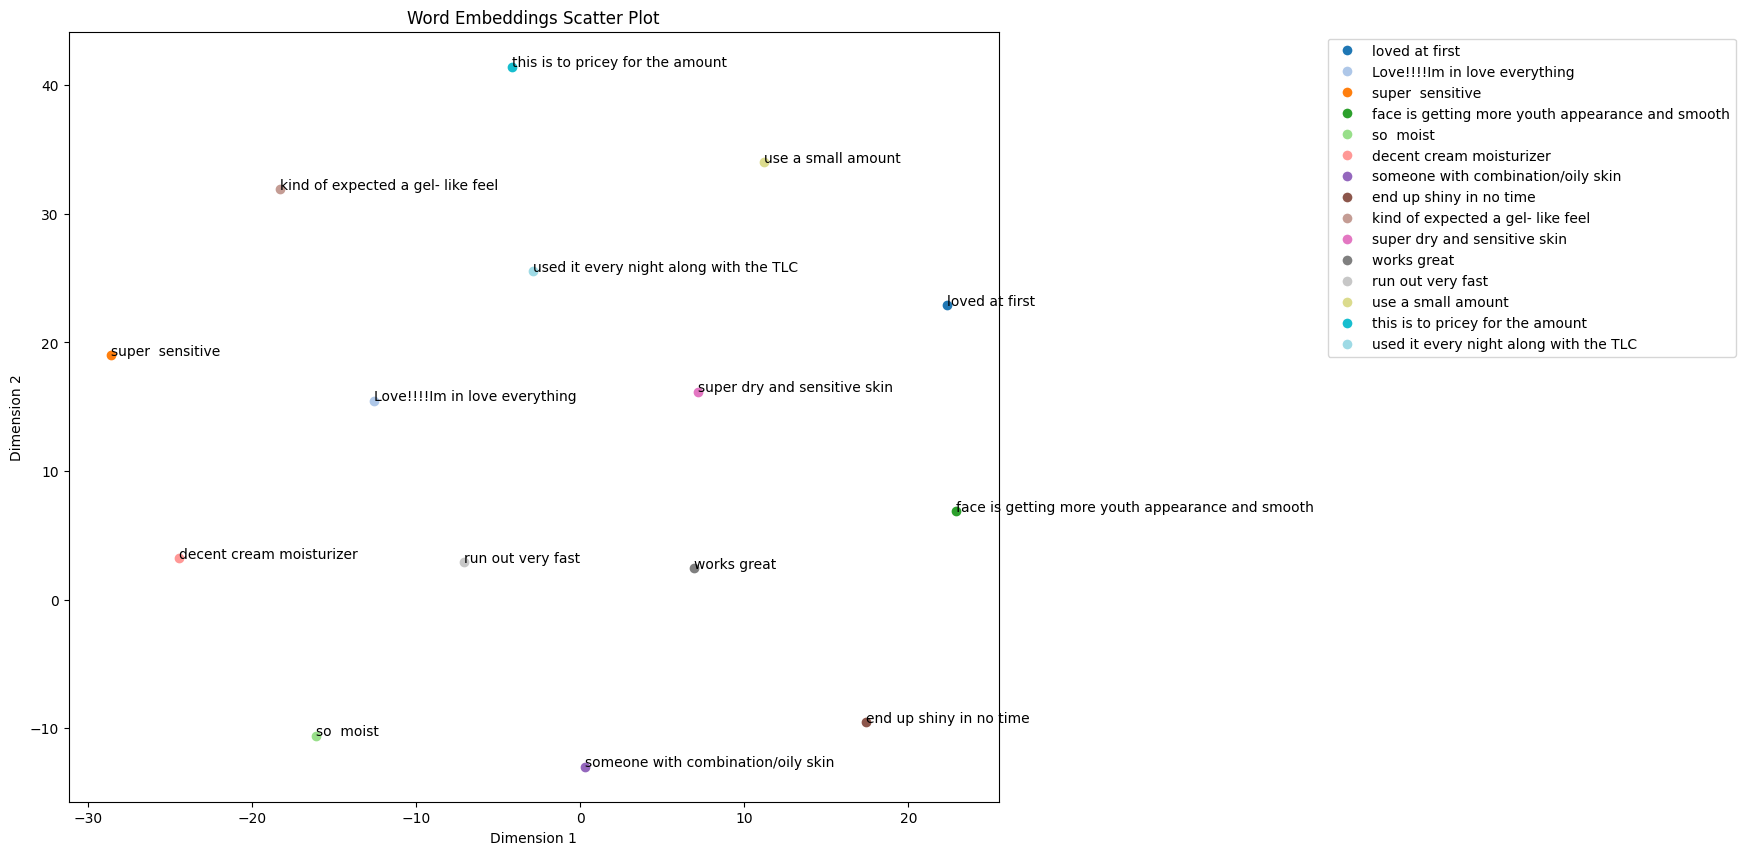

In [ ]:

keywords_summary = [
"loved at first","Love!!!!Im in love everything","super  sensitive","face is getting more youth appearance and smooth","so  moist","decent cream moisturizer",
"someone with combination/oily skin","end up shiny in no time","kind of expected a gel- like feel","super dry and sensitive skin", "works great",
"run out very fast","use a small amount","this is to pricey for the amount","used it every night along with the TLC"
]
# Train the Word2Vec model with tokenized sentences
model = Word2Vec(sentences=[keywords_summary], vector_size=100, window=5, min_count=1, workers=4)

# Get the word embeddings for specific words
word_embeddings = {word: model.wv[word] for word in keywords_summary if word in model.wv}

# Convert word embeddings to a 2D array
word_vectors_2d = np.array([model.wv[word] for word in word_embeddings])

# Reduce the dimensionality using t-SNE with reduced perplexity
perplexity_value = min(30, len(word_embeddings) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors_2d)

# Create the scatter plot
plt.figure(figsize=(12, 10))

# Loop through each unique word and plot it with a different color
colors = plt.cm.get_cmap('tab20', len(word_embeddings.keys()))
for i, (word, color) in enumerate(zip(word_embeddings.keys(), colors.colors)):
  plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1], color=color)
  plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=10)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embeddings Scatter Plot')

# Create a legend with labels and corresponding colors
labels = word_embeddings.keys()
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=8) for label, color in zip(labels, colors.colors)]
plt.legend(handles=handles, labels=labels, loc='upper right', bbox_to_anchor=(1.8, 1))

plt.show()

#### **KNOWLEDGE GRAPH**

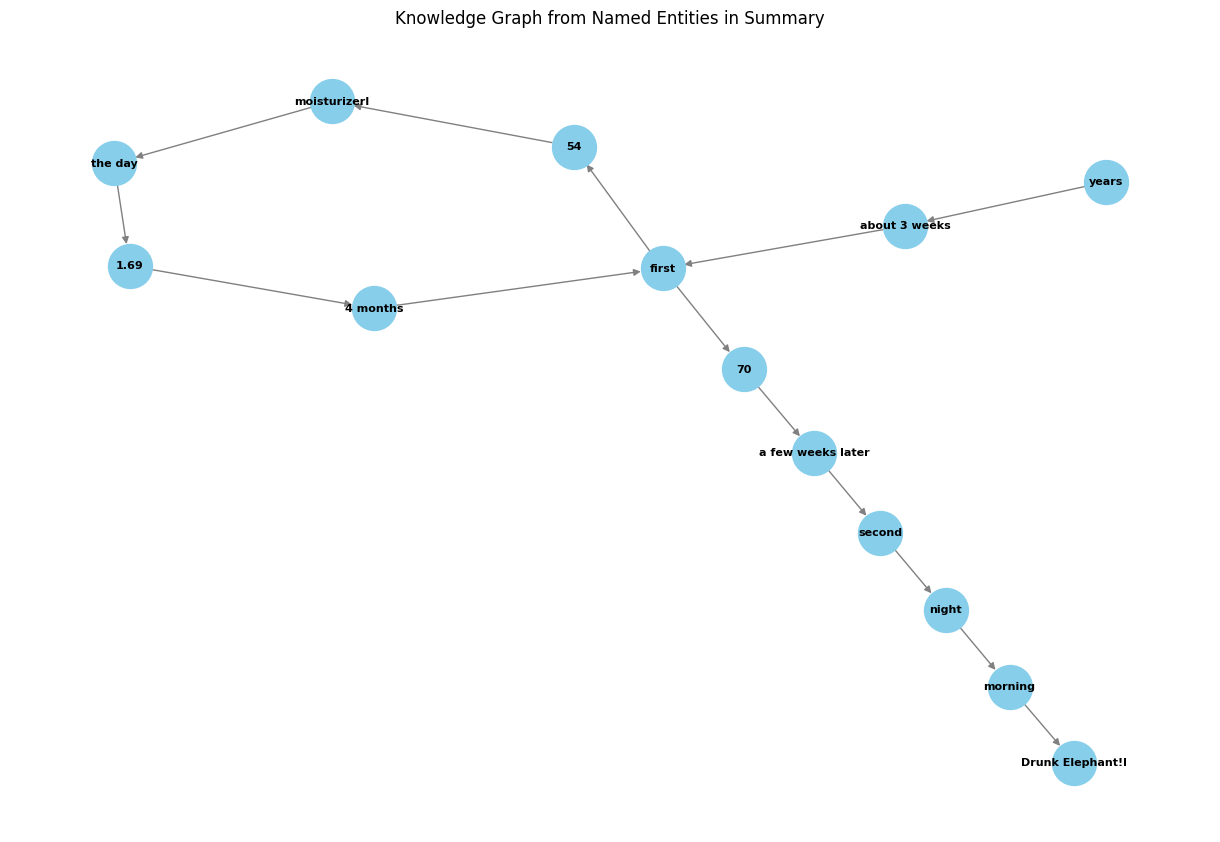

In [ ]:
# Load the spaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Process the summary with spaCy
doc = nlp(summary)

# Create a directed graph
G = nx.DiGraph()

# Extract named entities
entities = list(doc.ents)

# Add nodes for named entities
for ent in entities:
    G.add_node(ent.text, type=ent.label_)

# Connect named entities in the order they appear
for i in range(len(entities) - 1):
    prev_ent = entities[i]
    next_ent = entities[i + 1]
    G.add_edge(prev_ent.text, next_ent.text)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, font_weight='bold', node_color='skyblue', edge_color='gray')
plt.title("Knowledge Graph from Named Entities in Summary")
plt.show()


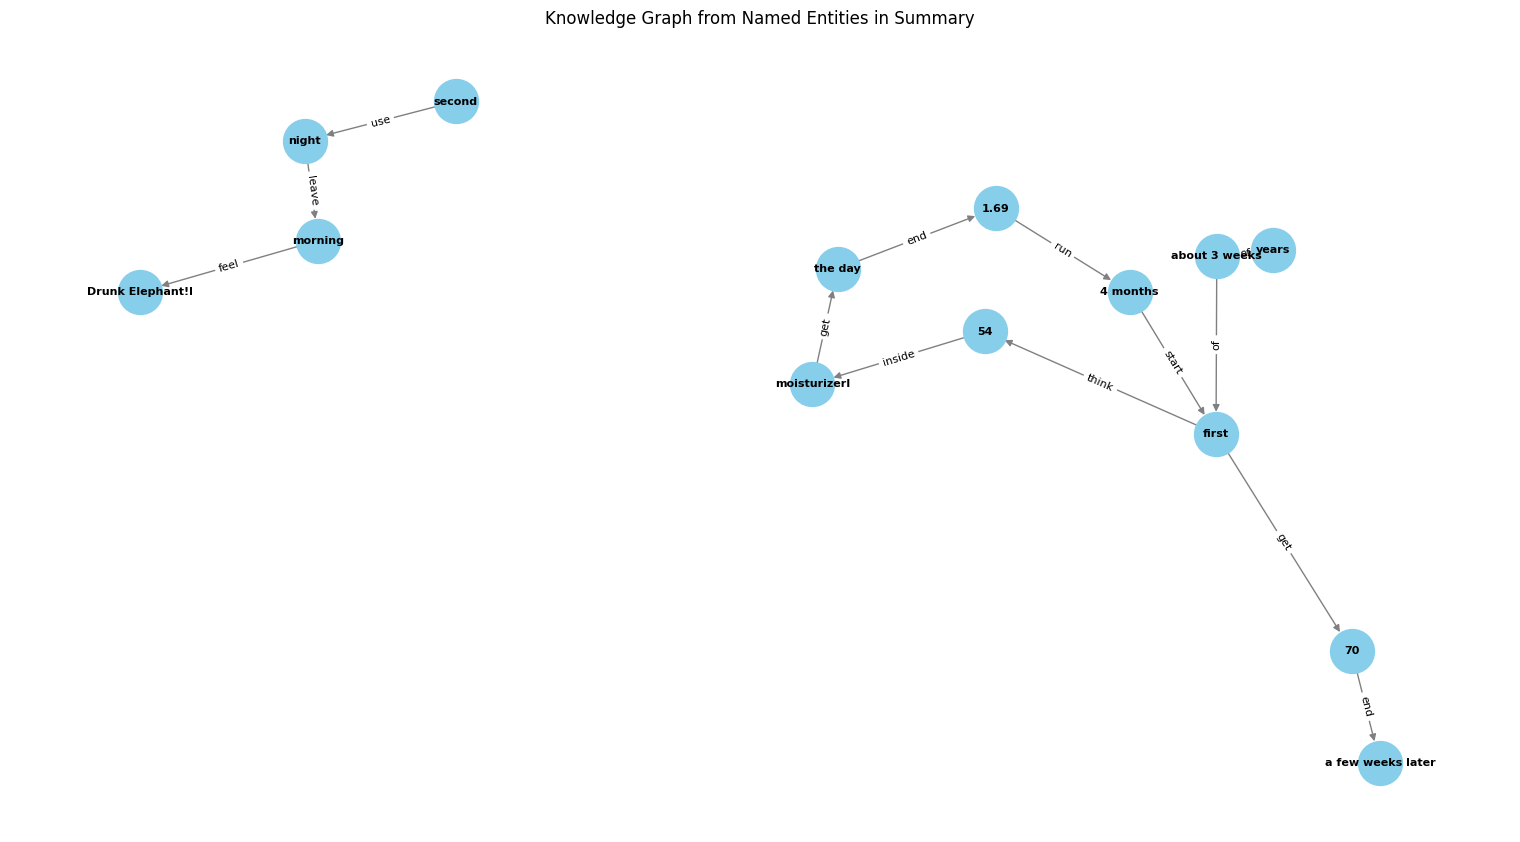

In [ ]:
def find_relationship(start_ent, end_ent):
    # Check if start_ent comes before end_ent
    if start_ent.start < end_ent.start:
        tokens_between = [t for t in doc[start_ent.end:end_ent.start]]
    else:
        tokens_between = [t for t in doc[end_ent.end:start_ent.start]]

    # Find the first verb or preposition token between the entities
    for token in tokens_between:
        if token.pos_ in ('VERB', 'ADP'):
            return token.lemma_
    return None

# Load the spaCy NLP model
nlp = spacy.load("en_core_web_sm")
# Assuming `summary` contains the text of your summary
doc = nlp(summary)

# Create a directed graph
G = nx.DiGraph()

# Extract named entities
entities = list(doc.ents)

# Add nodes for named entities and edges with labels
for i in range(len(entities) - 1):
    prev_ent = entities[i]
    next_ent = entities[i + 1]
    relationship = find_relationship(prev_ent, next_ent)
    if relationship:
        G.add_edge(prev_ent.text, next_ent.text, label=relationship)

# Draw the graph with edge labels
plt.figure(figsize=(15, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, font_weight='bold', node_color='skyblue', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['label'] for u, v in G.edges()}, font_size=8)
plt.title("Knowledge Graph from Named Entities in Summary")
plt.show()


#### **DENDOGRAMS**

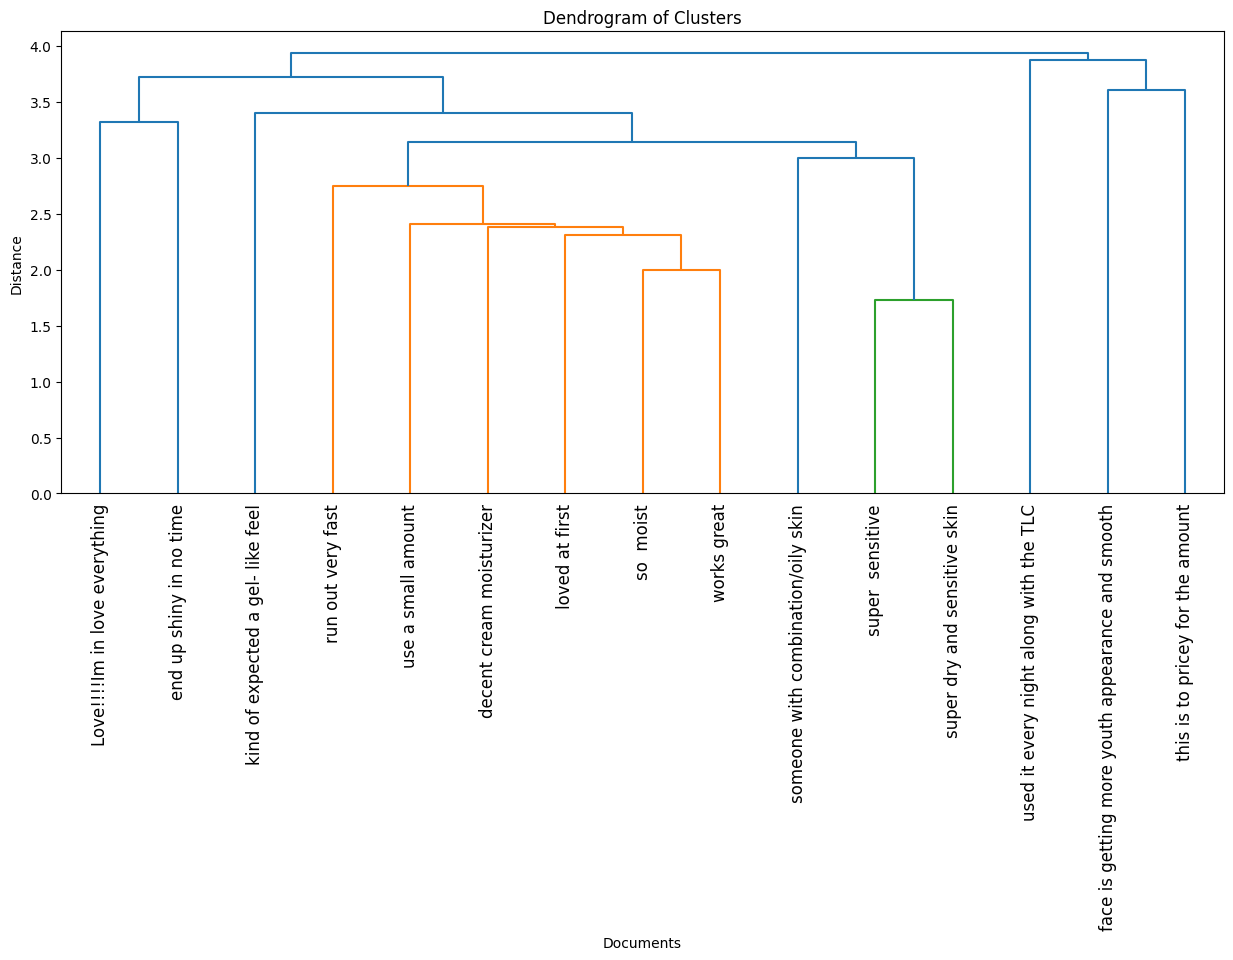

In [ ]:
# Create a CountVectorizer to convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(keywords_summary)

# Perform Agglomerative Clustering
n_clusters = 3  # You can adjust the number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = clustering.fit_predict(X.toarray())

# Create and plot the dendrogram
plt.figure(figsize=(15, 6))
linkage_matrix = linkage(X.toarray(), method='ward')
dendrogram(linkage_matrix, labels=keywords_summary, orientation='top')
plt.title("Dendrogram of Clusters")
plt.ylabel("Distance")
plt.xlabel("Documents")
plt.xticks(rotation=90)
plt.show()


#### **PREDICTIVE ANALYTICS**

In [ ]:
num_sentences_to_generate = 50
summary_pa=(generate_summary(num_sentences_to_generate, text))
summary_pa

[Love!!!!Im in love everything about it have super  sensitive and a bit a redness near me nose and big pores and now my face is getting more youth appearance and smooth is so  moist  without that an  oilly feelingMeh, I don’t really feel improvement after using this moisturizer.,
 It’s a decent cream moisturizer,  but for someone with combination/oily skin,  I have to use a very small amount during the day or I’ll end up shiny in no time.  ,
 I can’t say I’ve noticed a single change in my skin’s texture,  clarity,  or suppleness.  ,
 Highly, HIGHLY recommend!!I sadly gave this product 2 stars because,  even though I am a HUGE fan of this brand,  let’s face it almost everything works miracles from this line.  ,
 Because of this,  I’ve switched to using it at night only,  and my HG Clinique moisturizer during the day.  ,
 I’ll finish the container,  but will not be purchasing this,  or the included cleanser in the set.  ,
 I at first got this as a  sample since I didn’t want to spend $70

In [ ]:
# Saving the generated summary to a file
with open("predictive_analysis.txt", 'w') as file:
    file.write(str(summary_pa))

In [ ]:
# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Read the summary from a file
with open("predictive_analysis.txt", 'r') as file:
    summary_pa = file.read()

# Remove brackets and extra commas
summary_pa = summary_pa.replace('[', '').replace(']', '')
summary_pa = re.sub(',\s*,', ',', summary_pa)

# Process the text with spaCy
doc = nlp(summary_pa)

sia = SentimentIntensityAnalyzer()

data = []
for sent in doc.sents:
    sentence = sent.text.strip()  # Remove leading and trailing whitespace
    if sentence.startswith(','):
        sentence = sentence[1:].strip()

    # Skip adding the row if the sentence is empty
    if sentence == '':
        continue

    sentiment_score = sia.polarity_scores(sentence)
    compound_score = sentiment_score['compound']

    # Classify sentiment as positive, neutral, or negative
    if compound_score >= 0.3:
        sentiment_label = "positive"
    elif compound_score <= -0.3:
        sentiment_label = "negative"
    else:
        sentiment_label = "neutral"

    data.append((sentence, compound_score, sentiment_label))

df = pd.DataFrame(data, columns=['sentence', 'compound_score', 'sentiment_label'])
df


,sentence,compound_score,sentiment_label
0,Love!!!!Im in love everything about it have su...,0.9266,positive
1,"It’s a decent cream moisturizer, but for some...",-0.4215,negative
2,I can’t say I’ve noticed a single change in my...,0.5542,positive
3,"Because of this, I’ve switched to using it at...",0.0000,neutral
4,"I’ll finish the container, but will not be pu...",0.0000,neutral
5,I at first got this as a sample since I didn’...,0.2960,neutral
6,"I kind of expected a gel- like feel, but it’s...",0.5023,positive
7,feel like i need to clean the top oftenI don’...,0.5106,positive
8,"I have combo skin, with an oily t-zone, and Dr...",-0.3400,negative
9,"I’ve been using it for about 3 weeks so far, ...",0.0000,neutral


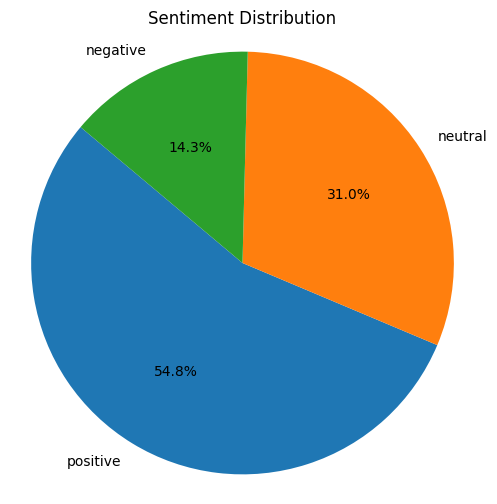

In [ ]:
# Count the number of each sentiment label
sentiment_counts = df['sentiment_label'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

In [ ]:
X = df[['compound_score']]
y = df['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
clf1 = make_pipeline(StandardScaler(), LogisticRegression())
clf2 = RandomForestClassifier(random_state=42)
clf3 = make_pipeline(StandardScaler(), SVC(probability=True))  # Enable probability estimates

meta_clf = LogisticRegression()
stacking_clf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                                  meta_classifier=meta_clf,
                                  use_probas=True,
                                  average_probas=False)

stacking_clf.fit(X_train, y_train)

StackingClassifier(classifiers=[Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('logisticregression',
                                                 LogisticRegression())]),
                                RandomForestClassifier(random_state=42),
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc',
                                                 SVC(probability=True))])],
                   meta_classifier=LogisticRegression(), use_probas=True)

In [ ]:
# Make predictions on the test data
y_pred = stacking_clf.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Compute precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
